### Importa los datos
Dataset con diferentes fármacos, sus efectos y ratings de los clientes.

Importa el dataset *drugLibTrain_raw.tsv*

In [27]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import seaborn as sns

In [8]:
drugs = pd.read_csv('data/drugLibTrain_raw.tsv',sep='\t',index_col=0)
drugs.head()

,urlDrugName,rating,effectiveness,sideEffects,condition,benefitsReview,sideEffectsReview,commentsReview
2202,enalapril,4,Highly Effective,Mild Side Effects,management of congestive heart failure,slowed the progression of left ventricular dys...,"cough, hypotension , proteinuria, impotence , ...","monitor blood pressure , weight and asses for ..."
3117,ortho-tri-cyclen,1,Highly Effective,Severe Side Effects,birth prevention,Although this type of birth control has more c...,"Heavy Cycle, Cramps, Hot Flashes, Fatigue, Lon...","I Hate This Birth Control, I Would Not Suggest..."
1146,ponstel,10,Highly Effective,No Side Effects,menstrual cramps,I was used to having cramps so badly that they...,Heavier bleeding and clotting than normal.,I took 2 pills at the onset of my menstrual cr...
3947,prilosec,3,Marginally Effective,Mild Side Effects,acid reflux,The acid reflux went away for a few months aft...,"Constipation, dry mouth and some mild dizzines...",I was given Prilosec prescription at a dose of...
1951,lyrica,2,Marginally Effective,Severe Side Effects,fibromyalgia,I think that the Lyrica was starting to help w...,I felt extremely drugged and dopey. Could not...,See above


In [9]:
drugs.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3107 entries, 2202 to 2748
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   urlDrugName        3107 non-null   object
 1   rating             3107 non-null   int64 
 2   effectiveness      3107 non-null   object
 3   sideEffects        3107 non-null   object
 4   condition          3106 non-null   object
 5   benefitsReview     3089 non-null   object
 6   sideEffectsReview  3032 non-null   object
 7   commentsReview     3095 non-null   object
dtypes: int64(1), object(7)
memory usage: 218.5+ KB


In [10]:
drugs = drugs.drop(columns=['condition','benefitsReview','sideEffectsReview','commentsReview'])

In [11]:
drugs['effectiveness'].unique()

array(['Highly Effective', 'Marginally Effective', 'Ineffective',
       'Considerably Effective', 'Moderately Effective'], dtype=object)

### Descriptive Analysis

Quedate únicamente con las columnas que podamos manejar: Columnas numéricas y columnas categóricas con pocas categorías (menos de 10)

#### Transforma las columnas categóricas

Transforma las columnas categoricas a numericas mediante dummies

In [12]:
### I'm up all night to get dummies
drugs = drugs.join(pd.get_dummies(drugs['effectiveness']))
drugs = drugs.join(pd.get_dummies(drugs['sideEffects']))
drugs = drugs.drop(columns=['effectiveness','sideEffects','urlDrugName'])
drugs.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3107 entries, 2202 to 2748
Data columns (total 11 columns):
 #   Column                         Non-Null Count  Dtype
---  ------                         --------------  -----
 0   rating                         3107 non-null   int64
 1   Considerably Effective         3107 non-null   bool 
 2   Highly Effective               3107 non-null   bool 
 3   Ineffective                    3107 non-null   bool 
 4   Marginally Effective           3107 non-null   bool 
 5   Moderately Effective           3107 non-null   bool 
 6   Extremely Severe Side Effects  3107 non-null   bool 
 7   Mild Side Effects              3107 non-null   bool 
 8   Moderate Side Effects          3107 non-null   bool 
 9   No Side Effects                3107 non-null   bool 
 10  Severe Side Effects            3107 non-null   bool 
dtypes: bool(10), int64(1)
memory usage: 143.4 KB


#### Genera el K Means 

In [31]:
kmeans = KMeans(n_clusters=2, n_init=42, random_state=42)
y_pred = kmeans.fit_predict(drugs)
silhouette_score(drugs,kmeans.labels_)


np.float64(0.6055089618561077)

In [30]:
k = [2,3,4,5,6,7]
results = {'k_number':[],'score':[]}
for elem in k:
    kmean = KMeans(n_clusters=elem, n_init=42, random_state=42)
    y_pred = kmean.fit_predict(drugs)
    results['k_number'].append(elem)
    results['score'].append(round(silhouette_score(drugs,kmean.labels_),4)*100)


#### Evalua cual es la mejor K

Utiliza silhouette_score para evaluar cual es la mejor K.

In [25]:
drugs_results = pd.DataFrame(results)
drugs_results.sort_values(by='score',ascending=False)

,k_number,score
0,2,60.55
1,3,43.82
5,7,41.40
2,4,39.71
4,6,38.49
3,5,35.63


Comprueba los resultados y muestra en un pie plot la distribución de los distintos clusters.

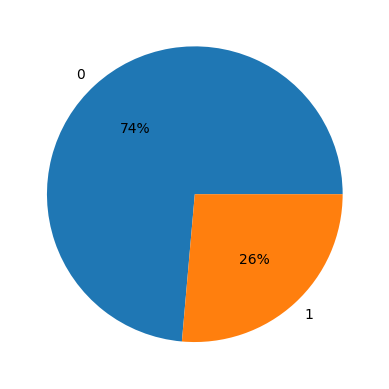

In [39]:
kmean_distrib = pd.Series(kmeans.labels_).value_counts()
plt.pie(kmean_distrib,labels=kmean_distrib.index,autopct='%.0f%%');